#### Import data

In [228]:
import pandas as pd

In [229]:
path = r"/Users/linzhiyao/Desktop/24summer_5310/csv"

In [230]:
Employee = pd.read_csv(path + "/employees.csv")
staff_Timeoff = pd.read_csv(path + "/staff_Timeoff.csv")
staff_shift = pd.read_csv(path + "/staff_shift.csv")
Stores = pd.read_csv(path + "/Stores.csv")
Inventory = pd.read_csv(path + "/Inventory.csv")
InventoryChanges = pd.read_csv(path + "/InventoryChanges.csv")
Suppliers = pd.read_csv(path + "/Suppliers.csv")
contact = pd.read_csv(path + "/contact.csv")
PurchaseOrders = pd.read_csv(path + "/PurchaseOrders.csv")
Deliveries = pd.read_csv(path + "/Deliveries.csv")
Customer = pd.read_csv(path + "/Customer.csv")
Deliver_Order = pd.read_csv(path + "/Deliver_Order.csv")
Categories = pd.read_csv(path + "/Categories.csv")
Products = pd.read_csv(path + "/Products.csv")
Orders = pd.read_csv(path + "/Orders.csv")
OrderDetails = pd.read_csv(path + "/OrderDetails.csv")
SalesTransactions = pd.read_csv(path + "/SalesTransactions.csv")
MembershipSubscriptions = pd.read_csv(path + "/MembershipSubscriptions.csv")
ProductReviews = pd.read_csv(path + "/ProductReviews.csv")
SalesProductsCombo = pd.read_csv(path + "/SalesProductsCombo.csv")
Revenue = pd.read_csv(path + "/Revenue.csv")
Expense = pd.read_csv(path + "/Expense.csv")

#### Prepare for postgresql

In [231]:
import psycopg2
from psycopg2 import sql

In [232]:
# Database connection parameters
db_params = {
    'dbname': 'final_proj',
    'user': 'postgres',
    'password': '123',
    'host': 'localhost',
    'port': '5432'
}

In [233]:
# SQL statements to create tables
create_table_statements = [
    '''
    CREATE TABLE Employee (
        EmployeeID INT PRIMARY KEY,
        FirstName VARCHAR(50),
        LastName VARCHAR(50),
        Position VARCHAR(50),
        StoreID INT,
        HireDate DATE,
        Salary DECIMAL(10, 2)
    );
    ''',
    '''
    CREATE TABLE staff_Timeoff (
        EmployeeID INT PRIMARY KEY,
        StartDate DATE,
        EndDate DATE,
        Reason VARCHAR(100),
        Status VARCHAR(50),
        FOREIGN KEY (EmployeeID) REFERENCES Employee(EmployeeID)
    );
    ''',
    '''
    CREATE TABLE staff_shift (
        ShiftID INT PRIMARY KEY,
        EmployeeID INT,
        StartTime TIME,
        EndTime TIME,
        Date DATE,
        FOREIGN KEY (EmployeeID) REFERENCES Employee(EmployeeID)
    );
    ''',
    '''
    CREATE TABLE Stores (
        StoreID INT PRIMARY KEY,
        StoreName VARCHAR(100),
        Address VARCHAR(100),
        City VARCHAR(50),
        State VARCHAR(50),
        ZipCode VARCHAR(10),
        ManagerID INT,
        FOREIGN KEY (ManagerID) REFERENCES Employee(EmployeeID)
    );
    ''',
    '''
    CREATE TABLE Inventory (
        ProductID INT,
        StoreID INT,
        Quantity INT,
        UnitCost DECIMAL(10, 2),
        PRIMARY KEY (ProductID, StoreID)
    );
    ''',
    '''
    CREATE TABLE InventoryChanges (
        ChangeID INT PRIMARY KEY,
        ProductID INT,
        StoreID INT,
        ChangeType VARCHAR(10),
        Quantity INT,
        ChangeDate DATE,
        FOREIGN KEY (ProductID, StoreID) REFERENCES Inventory(ProductID, StoreID)
    );
    ''',
    '''
    CREATE TABLE Suppliers (
        VendorID INT PRIMARY KEY,
        VendorName VARCHAR(100),
        Address VARCHAR(100),
        City VARCHAR(50),
        State VARCHAR(50),
        ZipCode VARCHAR(10),
        Country VARCHAR(50)
    );
    ''',
    '''
    CREATE TABLE contact (
        VendorID INT PRIMARY KEY,
        Liaison VARCHAR(50),
        Phone VARCHAR(50),
        FOREIGN KEY (VendorID) REFERENCES Suppliers(VendorID)
    );
    ''',
    '''
    CREATE TABLE PurchaseOrders (
        PurchaseOrderID INT PRIMARY KEY,
        VendorID INT,
        OrderDate DATE,
        ShippedDate DATE,
        Status VARCHAR(50),
        TotalAmount DECIMAL(10, 2),
        FOREIGN KEY (VendorID) REFERENCES Suppliers(VendorID)
    );
    ''',
    '''
    CREATE TABLE Deliveries (
        Delivercompany_ID INT PRIMARY KEY,
        Company_Name VARCHAR(100),
        Address VARCHAR(100),
        City VARCHAR(50),
        State VARCHAR(50),
        ZipCode VARCHAR(10),
        Country VARCHAR(50),
        Pricepercar DECIMAL(10, 2)
    );
    ''',
    '''
    CREATE TABLE Customer (
        CustomerID INT PRIMARY KEY,
        FirstName VARCHAR(50),
        LastName VARCHAR(50),
        Email VARCHAR(100),
        Phone VARCHAR(50),
        Address VARCHAR(255)
    );
    ''',
    '''
    CREATE TABLE Deliver_Order (
        Deliverorder_ID INT PRIMARY KEY,
        Products VARCHAR(255),
        Quantity INT,
        Date DATE,
        StoreID INT,
        CustomerID INT,
        DeliveryFee DECIMAL(10, 2),
        FOREIGN KEY (StoreID) REFERENCES Stores(StoreID),
        FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID)
    );
    ''',
    '''
    CREATE TABLE Categories (
        CategoryID INT PRIMARY KEY,
        Name VARCHAR(100),
        Description VARCHAR(255)
    );
    ''',
    '''
    CREATE TABLE Products (
        ProductID INT PRIMARY KEY,
        Name VARCHAR(100),
        Description VARCHAR(255),
        Price DECIMAL(10, 2),
        CategoryID INT,
        FOREIGN KEY (CategoryID) REFERENCES Categories(CategoryID)
    );
    ''',
    '''
    CREATE TABLE Orders (
        OrderID INT PRIMARY KEY,
        CustomerID INT,
        OrderDate DATE,
        FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID)
    );
    ''',
    '''
    CREATE TABLE OrderDetails (
        OrderDetailID INT PRIMARY KEY,
        OrderID INT,
        ProductID INT,
        Quantity INT,
        UnitPrice DECIMAL(10, 2),
        FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
        FOREIGN KEY (ProductID) REFERENCES Products(ProductID)
    );
    ''',
    '''
    CREATE TABLE SalesTransactions (
        TransactionID INT PRIMARY KEY,
        StoreID INT,
        OrderID INT,
        TransactionDate DATE,
        TotalAmount DECIMAL(10, 2),
        FOREIGN KEY (StoreID) REFERENCES Stores(StoreID),
        FOREIGN KEY (OrderID) REFERENCES Orders(OrderID)
    );
    ''',
    '''
    CREATE TABLE MembershipSubscriptions (
        SubscriptionID INT PRIMARY KEY,
        CustomerID INT,
        SubscriptionType VARCHAR(50),
        StartDate DATE,
        EndDate DATE,
        SubscriptionFee DECIMAL(10, 2),
        FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID)
    );
    ''',
    '''
    CREATE TABLE ProductReviews (
        ReviewID INT PRIMARY KEY,
        ProductID INT,
        CustomerID INT,
        Rating INT,
        ReviewText TEXT,
        ReviewDate DATE,
        FOREIGN KEY (ProductID) REFERENCES Products(ProductID),
        FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID)
    );
    ''',
    '''
    CREATE TABLE SalesProductsCombo (
        ComboID INT PRIMARY KEY,
        ProductID1 INT,
        ProductID2 INT,
        NumberofSales INT,
        TotalRevenue DECIMAL(10, 2),
        FOREIGN KEY (ProductID1) REFERENCES Products(ProductID),
        FOREIGN KEY (ProductID2) REFERENCES Products(ProductID)
    );
    ''',
    '''
    CREATE TABLE Revenue (
        RevenueID INT PRIMARY KEY,
        StoreID INT,
        Month DATE,
        Amount DECIMAL(10, 2),
        FOREIGN KEY (StoreID) REFERENCES Stores(StoreID)
    );
    ''',
    '''
    CREATE TABLE Expense (
        ExpenseID INT PRIMARY KEY,
        StoreID INT,
        Month DATE,
        ExpenseType VARCHAR(50),
        Amount DECIMAL(10, 2),
        FOREIGN KEY (StoreID) REFERENCES Stores(StoreID)
    );
    '''
]

In [234]:
def create_tables():
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()

    try:
        # Execute each table creation statement
        for statement in create_table_statements:
            cursor.execute(statement)
            print("Table created successfully.")
    
        # Commit the changes
        conn.commit()
    except Exception as e:
        print(f"Error creating tables: {e}")
        conn.rollback()
    finally:
        # Close the cursor and connection
        cursor.close()
        conn.close()


#### Insert values

In [235]:
import pandas as pd
from sqlalchemy import create_engine

In [236]:
# Connect to your database
conn = psycopg2.connect(
    dbname="final_proj",
    user="postgres",
    password="123",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()
conn.commit()
cursor.execute("DROP SCHEMA public CASCADE;")
cursor.execute("CREATE SCHEMA public;")

In [237]:
for statement in create_table_statements:
            cursor.execute(statement)
            print("Table created successfully.")
    
        # Commit the changes
conn.commit()

Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.
Table created successfully.


In [238]:
# Inserting the 'Employee' DataFrame into the 'employee' table in the database
for index, row in Employee.iterrows():
    cursor.execute(
        "INSERT INTO employee (EmployeeID, FirstName, LastName, Position, StoreID, HireDate, Salary) VALUES (%s, %s, %s, %s, %s, %s, %s)",
        (row['EmployeeID'], row['FirstName'], row['LastName'], row['Position'], row['StoreID'], row['HireDate'], row['Salary'])
    )
conn.commit()  # Committing the transaction

In [239]:
# Insert staff_Timeoff
for index, row in staff_Timeoff.iterrows():
    cursor.execute(
        "INSERT INTO staff_timeoff (EmployeeID, StartDate, EndDate, Reason, Status) VALUES (%s, %s, %s, %s, %s)",
        (row['EmployeeID'], row['StartDate'], row['EndDate'], row['Reason'], row['Status'])
    )
conn.commit()  # Committing the transaction

In [240]:
# staff_shift
for index, row in staff_shift.iterrows():
    cursor.execute(
        "INSERT INTO staff_shift (ShiftID, EmployeeID, StartTime, EndTime, Date) VALUES (%s, %s, %s, %s, %s)",
        (row['ShiftID'], row['EmployeeID'], row['StartTime'], row['EndTime'], row['Date'])
    )
conn.commit()  # Committing the transaction

In [241]:
# Stores
for index, row in Stores.iterrows():
    cursor.execute(
        "INSERT INTO Stores(StoreID, StoreName, Address, City, State, ZipCode, ManagerID) VALUES (%s, %s, %s, %s, %s, %s, %s)",
        (row['StoreID'], row['StoreName'], row['Address'], row['City'], row['State'], row['ZipCode'], row['ManagerID'])
    )
conn.commit()  # Committing the transaction

In [242]:
# Inventory
for index, row in Inventory.iterrows():
    cursor.execute(
        "INSERT INTO Inventory(ProductID, StoreID, Quantity, UnitCost) VALUES (%s, %s, %s, %s)",
        (row['ProductID'], row['StoreID'], row['Quantity'], row['UnitCost'])
    )
conn.commit()  # Committing the transaction

In [243]:
# InventoryChanges
for index, row in InventoryChanges.iterrows():
    cursor.execute(
        "INSERT INTO InventoryChanges(ChangeID, ProductID, StoreID, ChangeType, Quantity, ChangeDate) VALUES (%s, %s, %s, %s, %s, %s)",
        (row['ChangeID'], row['ProductID'], row['StoreID'], row['ChangeType'], row['Quantity'], row['ChangeDate'])
    )
conn.commit()  # Committing the transaction

In [244]:
# Suppliers
for index, row in Suppliers.iterrows():
    cursor.execute(
        "INSERT INTO Suppliers(VendorID, VendorName, Address, City, State, ZipCode, Country) VALUES (%s, %s, %s, %s, %s, %s, %s)",
        (row['VendorID'], row['VendorName'], row['Address'], row['City'], row['State'], row['ZipCode'], row['Country'])
    )
conn.commit()  # Committing the transaction

In [245]:
# contact
for index, row in contact.iterrows():
    cursor.execute(
        "INSERT INTO contact(VendorID, Liaison, Phone) VALUES (%s, %s, %s)",
        (row['VendorID'], row['Liaison'], row['Phone'])
    )
conn.commit()  # Committing the transaction

In [246]:
# PurchaseOrders
for index, row in PurchaseOrders.iterrows():
    cursor.execute(
        "INSERT INTO PurchaseOrders(PurchaseOrderID, VendorID, OrderDate, ShippedDate, Status, TotalAmount) VALUES (%s, %s, %s, %s, %s, %s)",
        (row['PurchaseOrderID'], row['VendorID'], row['OrderDate'], row['ShippedDate'], row['Status'], row['TotalAmount'])
    )
conn.commit()  # Committing the transaction

In [247]:
# Deliveries
for index, row in Deliveries.iterrows():
    cursor.execute(
        "INSERT INTO Deliveries(Delivercompany_ID, Company_Name, Address, City, State, ZipCode, Country, Pricepercar) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)",
        (row['Delivercompany_ID'], row['Company_Name'], row['Address'], row['City'], row['State'], row['ZipCode'], row['Country'], row['Pricepercar'])
    )
conn.commit()  # Committing the transaction

In [248]:
# Customer
for index, row in Customer.iterrows():
    cursor.execute(
        "INSERT INTO Customer(CustomerID, FirstName, LastName, Email, Phone, Address) VALUES (%s, %s, %s, %s, %s, %s)",
        (row['CustomerID'], row['FirstName'], row['LastName'], row['Email'], row['Phone'], row['Address'])
    )
conn.commit()  # Committing the transaction

In [249]:
# Deliver_Order
for index, row in Deliver_Order.iterrows():
    cursor.execute(
        "INSERT INTO Deliver_Order(Deliverorder_ID, Products, Quantity, Date, StoreID, CustomerID, DeliveryFee) VALUES (%s, %s, %s, %s, %s, %s, %s)",
        (row['Deliverorder_ID'], row['Products'], row['Quantity'], row['Date'], row['StoreID'], row['CustomerID'], row['DeliveryFee'])
    )
conn.commit()  # Committing the transaction

In [250]:
# Categories
for index, row in Categories.iterrows():
    cursor.execute(
        "INSERT INTO Categories(CategoryID, Name, Description) VALUES (%s, %s, %s)",
        (row['CategoryID'], row['Name'], row['Description'])
    )
conn.commit()  # Committing the transaction

In [251]:
# Products
for index, row in Products.iterrows():
    cursor.execute(
        "INSERT INTO Products(ProductID, Name, Description, Price, CategoryID) VALUES (%s, %s, %s, %s, %s)",
        (row['ProductID'], row['Name'], row['Description'], row['Price'], row['CategoryID'])
    )
conn.commit()  # Committing the transaction

In [252]:
# Orders
for index, row in Orders.iterrows():
    cursor.execute(
        "INSERT INTO Orders(OrderID, CustomerID, OrderDate) VALUES (%s, %s, %s)",
        (row['OrderID'], row['CustomerID'], row['OrderDate'])
    )
conn.commit()  # Committing the transaction

In [253]:
# OrderDetails
for index, row in OrderDetails.iterrows():
    cursor.execute(
        "INSERT INTO OrderDetails(OrderDetailID, OrderID, ProductID, Quantity, UnitPrice) VALUES (%s, %s, %s, %s, %s)",
        (row['OrderDetailID'], row['OrderID'], row['ProductID'], row['Quantity'], row['UnitPrice'])
    )
conn.commit()  # Committing the transaction

In [254]:
# SalesTransactions
for index, row in SalesTransactions.iterrows():
    cursor.execute(
        "INSERT INTO SalesTransactions(TransactionID, StoreID, OrderID, TransactionDate, TotalAmount) VALUES (%s, %s, %s, %s, %s)",
        (row['TransactionID'], row['StoreID'], row['OrderID'], row['TransactionDate'], row['TotalAmount'])
    )
conn.commit()  # Committing the transaction

In [255]:
# MembershipSubscriptions
for index, row in MembershipSubscriptions.iterrows():
    cursor.execute(
        "INSERT INTO MembershipSubscriptions(SubscriptionID, CustomerID, SubscriptionType, StartDate, EndDate, SubscriptionFee) VALUES (%s, %s, %s, %s, %s, %s)",
        (row['SubscriptionID'], row['CustomerID'], row['SubscriptionType'], row['StartDate'], row['EndDate'], row['SubscriptionFee'])
    )
conn.commit()  # Committing the transaction

In [256]:
# ProductReviews
for index, row in ProductReviews.iterrows():
    cursor.execute(
        "INSERT INTO ProductReviews(ReviewID, ProductID, CustomerID, Rating, ReviewText, ReviewDate) VALUES (%s, %s, %s, %s, %s, %s)",
        (row['ReviewID'], row['ProductID'], row['CustomerID'], row['Rating'], row['ReviewText'], row['ReviewDate'])
    )
conn.commit()  # Committing the transaction

In [257]:
# SalesProductsCombo
for index, row in SalesProductsCombo.iterrows():
    cursor.execute(
        "INSERT INTO SalesProductsCombo(ComboID, ProductID1, ProductID2, NumberofSales, TotalRevenue) VALUES (%s, %s, %s, %s, %s)",
        (row['ComboID'], row['ProductID1'], row['ProductID2'], row['NumberofSales'], row['TotalRevenue'])
    )
conn.commit()  # Committing the transaction

In [258]:
# Revenue
for index, row in Revenue.iterrows():
    cursor.execute(
        "INSERT INTO Revenue(RevenueID, StoreID, Month, Amount) VALUES (%s, %s, %s, %s)",
        (row['RevenueID'], row['StoreID'], row['Month'], row['Amount'])
    )
conn.commit()  # Committing the transaction

In [259]:
# Expense
for index, row in Expense.iterrows():
    cursor.execute(
        "INSERT INTO Expense(ExpenseID, StoreID, Month, ExpenseType, Amount) VALUES (%s, %s, %s, %s, %s)",
        (row['ExpenseID'], row['StoreID'], row['Month'], row['ExpenseType'], row['Amount'])
    )
conn.commit()  # Committing the transaction

## Business requirements


1. Centralize Data Management: Streamline the process of storing and accessing data related to staffing, inventory, vendors, deliveries, sales, products, revenue, and any other relevant metrics across all stores. Implement a robust database system to ensure data integrity and efficient retrieval. --- Create Database


2. Staffing Management & Optimization: Enhance the staffing tracking system to include shifts, time off, attendance patterns. 

In [260]:
## 1.who makes shift and how many times 
queryCmd = f'''SELECT 
                EmployeeID,
                COUNT(Date) AS Shift_times
                FROM 
                staff_shift
                WHERE 
                Date BETWEEN '2024-08-01' AND '2024-08-31'
                GROUP BY 
                EmployeeID;'''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,employeeid,shift_times
0,9,1
1,36,1
2,69,1
3,77,1
4,87,1
5,123,1
6,137,1
7,180,1
8,256,1
9,375,1


In [261]:
# 2.timeoff
queryCmd = f'''SELECT 
                EmployeeID,
                SUM((EndDate - StartDate) + 1) AS TimeOffDays
            FROM 
                staff_timeoff
            WHERE 
                StartDate BETWEEN '2024-08-01' AND '2024-08-31'
            GROUP BY 
                EmployeeID;'''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,employeeid,timeoffdays
0,31,13
1,58,5
2,136,15
3,190,4
4,251,13
5,327,5
6,499,8


3. Financial Analysis & Reporting: Develop advanced financial dashboards that not only calculate total revenue, salary cost, and profitability per store. Show the rank of stores in terms of each figure.

In [262]:
## 3.total revenue
queryCmd = f'''SELECT
                    ROW_NUMBER() OVER (ORDER BY SUM(Amount) DESC) AS Rank,
                    StoreID,
                    SUM(Amount) AS TotalRevenue
                FROM
                    Revenue
                WHERE
                    Month BETWEEN '2024-08-01' AND '2024-08-31'
                GROUP BY
                    StoreID
                ORDER BY
                    TotalRevenue DESC;'''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,rank,storeid,totalrevenue
0,1,4,31778822.97
1,2,5,29928409.48
2,3,1,24798150.98
3,4,3,23902753.13
4,5,2,19686421.20


In [263]:
## 4.expense
queryCmd = f'''SELECT
                storeid,
                expensetype,
                SUM(amount) AS expense
            FROM
                expense
            GROUP BY
                storeid,
                expensetype
            order by 
                storeid'''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,storeid,expensetype,expense
0,1,Rent,1408296.15
1,1,Utilities,2326717.78
2,1,Supplies,1591788.89
3,1,Maintenance,2594738.00
4,1,Salaries,1183303.30
5,2,Utilities,1678900.26
6,2,Supplies,2361740.85
7,2,Rent,1477230.83
8,2,Salaries,2899298.74
9,2,Maintenance,1659562.00


In [264]:
##5
queryCmd = f'''SELECT
                storeid,
                SUM(amount) AS expense
            FROM
                expense
            GROUP BY
                storeid
            order by 
                storeid'''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,storeid,expense
0,1,9104844.12
1,2,10076732.68
2,3,11456897.61
3,4,9497389.85
4,5,9711103.55


In [265]:
#6.profitability
queryCmd = f'''WITH total_expense AS (SELECT storeid,
                                            SUM(amount) AS expense
                                        FROM
                                            expense
                                        GROUP BY
                                            storeid)
                                    SELECT
                                        ROW_NUMBER() OVER (ORDER BY (SUM(R.amount) - COALESCE(E.expense, 0)) DESC) AS Rank,
                                        R.storeid AS StoreID,
                                        (SUM(R.amount) - COALESCE(E.expense, 0)) AS Profit
                                    FROM
                                        Revenue R
                                    LEFT JOIN
                                        total_expense E
                                    ON
                                        R.storeid = E.storeid
                                    WHERE
                                        R.month BETWEEN '2024-08-01' AND '2024-08-31'
                                    GROUP BY
                                        R.storeid, E.expense
                                    ORDER BY
                                        Profit DESC;
                '''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df


,rank,storeid,profit
0,1,4,22281433.12
1,2,5,20217305.93
2,3,1,15693306.86
3,4,3,12445855.52
4,5,2,9609688.52


4. Inventory Optimization: Implement an inventory management system that checks inventory levels at the end of each month and suggest ideal quantities to purchase from vendors. Calculate products number that each month left and design proper plan to buy from vendor.

In [266]:
##7
queryCmd = f'''SELECT
                    storeid,
                    productid,
                    SUM(CASE
                        WHEN changetype = 'Add' THEN quantity
                        WHEN changetype = 'Remove' THEN -quantity
                        ELSE 0
                    END) AS total_quantity
                FROM
                    InventoryChanges
                WHERE
                    changedate <= '2024-08-31'
                GROUP BY
                    storeid,
                    productid
                ORDER BY
                    storeid,
                    productid
                '''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,storeid,productid,total_quantity
0,1,1,15
1,1,2,-13
2,1,3,28
3,1,4,3
4,1,5,-70
...,...,...,...
995,5,196,12
996,5,197,-6
997,5,198,45
998,5,199,78


In [267]:
##8
queryCmd = f'''SELECT
                    productid,
                    SUM(CASE
                        WHEN changetype = 'Add' THEN quantity
                        WHEN changetype = 'Remove' THEN -quantity
                        ELSE 0
                    END) AS total_quantity_all
                FROM
                    InventoryChanges
                WHERE
                    changedate <= '2024-08-31'
                GROUP BY
                    productid
                order by 
                    total_quantity_all Desc
                '''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,productid,total_quantity_all
0,87,328
1,144,328
2,2,324
3,108,294
4,14,292
...,...,...
195,18,-286
196,46,-308
197,43,-329
198,24,-330


5. Product Placement & Bundling Optimization: Utilize sales data to find the most popular product combinations. Use these data suggest optimal product placements and promotions to maximize sales and customer satisfaction.

In [268]:
##9
queryCmd = f'''WITH ranked_combos AS (
                        SELECT
                            ROW_NUMBER() OVER (ORDER BY numberofsales DESC) AS rank,
                            productid1,
                            productid2,
                            numberofsales,
                            totalrevenue
                        FROM
                            salesproductscombo
                    )
                    SELECT
                        rank,
                        productid1,
                        productid2,
                        numberofsales,
                        totalrevenue
                    FROM
                        ranked_combos
                    WHERE
                        rank <= 10;
                '''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,rank,productid1,productid2,numberofsales,totalrevenue
0,1,23,48,500,9821.10
1,2,106,382,500,16484.51
2,3,36,411,497,6067.17
3,4,334,204,497,45140.91
4,5,104,311,496,49612.83
5,6,78,79,495,7940.66
6,7,143,216,494,44693.62
7,8,169,89,494,1203.88
8,9,406,239,493,7646.38
9,10,344,82,493,48156.85


6. Leverage subscription data to enhance membership management strategies. By analyzing subscription data, we aim to improve customer satisfaction and increase revenue.

In [270]:
## 10 
queryCmd = f'''SELECT SubscriptionType,
                        SUM(SubscriptionFee) AS TotalRevenue
                    FROM membershipsubscriptions
                    GROUP BY SubscriptionType;
                '''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,subscriptiontype,totalrevenue
0,Basic,20756.98
1,VIP,16503.21
2,Premium,18296.89


In [271]:
## 11 
queryCmd = f'''SELECT * FROM membershipsubscriptions
                WHERE EndDate BETWEEN CURRENT_DATE AND CURRENT_DATE + INTERVAL '30 days';           
                '''  
cursor.execute(queryCmd)
rows = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
df = pd.DataFrame(rows, columns=colnames)
df

,subscriptionid,customerid,subscriptiontype,startdate,enddate,subscriptionfee
0,56,3,VIP,2024-05-08,2024-09-05,165.28
1,71,106,VIP,2023-07-20,2024-09-03,143.31
2,79,273,Premium,2023-04-11,2024-08-22,99.05
3,92,312,Basic,2024-07-26,2024-09-01,94.81
4,94,365,VIP,2024-04-27,2024-08-21,52.51
5,119,199,Basic,2024-05-18,2024-09-04,109.85
6,136,458,Premium,2024-03-26,2024-08-22,98.47
7,140,13,VIP,2023-02-22,2024-08-17,70.14
8,156,125,VIP,2024-05-25,2024-08-25,194.65
9,177,286,VIP,2024-06-23,2024-08-09,164.01


In [277]:
query = """
    SELECT 
            DATE_TRUNC('month', StartDate) AS Month, 
            SUM(SubscriptionFee) AS MonthlyRevenue   
        FROM 
            membershipsubscriptions
        GROUP BY 
            DATE_TRUNC('month', StartDate) 
        ORDER BY 
            Month;
"""
df = pd.read_sql_query(query, conn)
df

/var/folders/qj/15hq2_4x2dg6cssltsjzr8jc0000gn/T/ipykernel_28925/93958837.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,month,monthlyrevenue
0,2022-08-01 00:00:00+00:00,1659.48
1,2022-09-01 00:00:00+00:00,1562.49
2,2022-10-01 00:00:00+00:00,2611.63
3,2022-11-01 00:00:00+00:00,2095.30
4,2022-12-01 00:00:00+00:00,1771.56
5,2023-01-01 00:00:00+00:00,2158.50
6,2023-02-01 00:00:00+00:00,2445.64
7,2023-03-01 00:00:00+00:00,2180.83
8,2023-04-01 00:00:00+00:00,1263.12
9,2023-05-01 00:00:00+00:00,2060.58


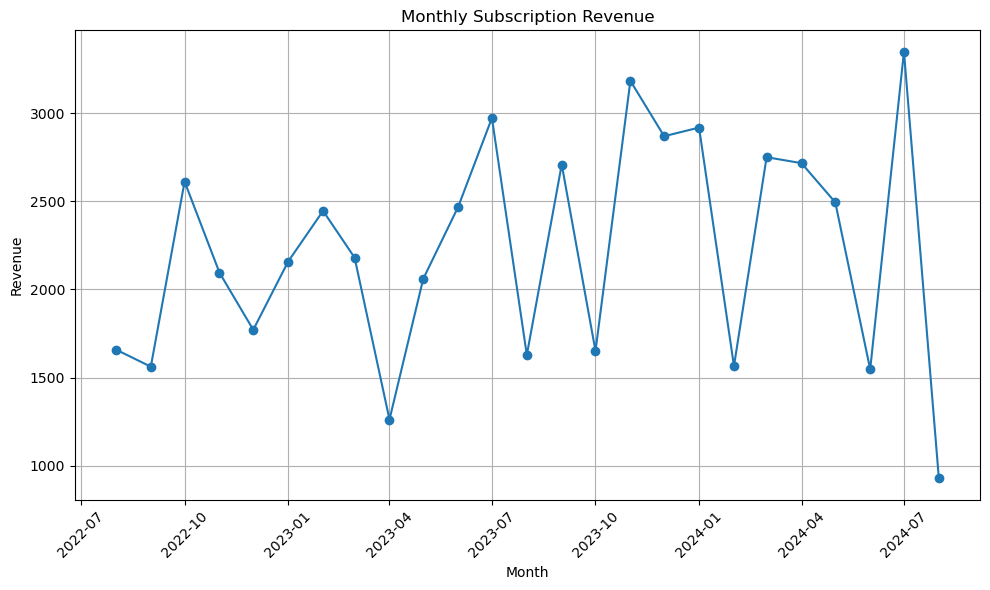

In [282]:
import matplotlib.pyplot as plt
# 生成图表
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['monthlyrevenue'], marker='o')
plt.title('Monthly Subscription Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [269]:
#cursor.close()
#conn.close()  